In [108]:
pip install nxviz

In [17]:
import pandas as pd
import networkx as nx
import nxviz as nv
import matplotlib.pyplot as plt
from itertools import combinations

In [76]:
def build_grafo (caminho_csv):
    # Lê o arquivo .csv
    df = pd.read_csv(caminho_csv)

    # Inicializa o grafo
    G = nx.Graph()

    # Agrupa os ingredientes por receita
    for receita, grupo in df.groupby('nome_receita'):
        # Separa em duas listas os ingredientes e os seus tipos(finecessario transformar em lista de lista para funcionar)
        ingredientes = grupo['ingredientes'].apply(lambda x: [i.strip() for i in x.split(',')]).tolist()
        tipos = grupo['tipos_ingredientes'].apply(lambda x: [i.strip() for i in x.split(',')]).tolist()

        # Criação de um dicionario para a criação dos nós associando os ingredientes aos seus tipos
        ing_types=dict(zip(ingredientes[0], tipos[0]))

        # Adiciona os nós com atributos
        for ingrediente in ingredientes[0]:
            if not G.has_node(ingrediente): # Impede de adicionar nós já criados
                G.add_node(ingrediente, tipo=ing_types[ingrediente])

        # Cria arestas entre todos os pares de ingredientes na mesma receita
        for ing1, ing2 in combinations(ingredientes[0], 2):
            if not G.has_edge(ing1, ing2):  # Impede de adicionar arestas já criadas
                G.add_edge(ing1, ing2)

    return G

In [77]:
grafo=build_grafo('ingredientes.csv') # Usa a função em si

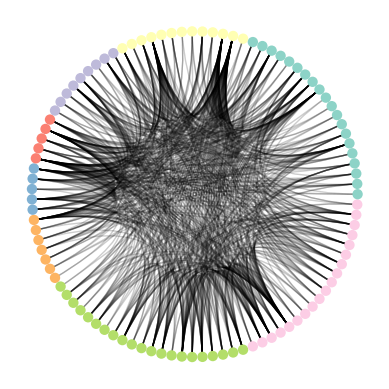

-0.031542898899853546

In [105]:
# Plota o grafico em formato circular e com arestas em arco, separando e identificando os nós pelos seus tipos
ax = nv.circos(grafo, group_by="tipo", node_color_by="tipo")
plt.show()

# Computa o grau de assortatividade
nx.attribute_assortativity_coefficient(grafo, "tipo")

#Resultados:
- Como o esperado, há uma assortatividade negativa, mas ainda próxima de zero. Esse fato demonstra uma heterofilia, ou seja, a tendência a utilizar ingredientes de diferentes categorias, o que é intuitiv. Mas devido a concentração de ingredientes classificados como vegetais, carboidratos e proteínas, vistos nas cores verde, rosa e ciano, há uma menor diversificação dos tipos de ingredientes nas receitas. Juntando isso ao fato de existir pratos que concentram diversos ingredientes de um mesmo tipo, como feijoada para proteínas e vinagrete para vegetais, temos essa aproximação do grau de assortatividade ao zero.
